# Introduction to NumPy

* Numpy provides efficient storage and data operations
* http://www.numpy.org/ for more info and installation instructions




* Numpy: supports numerical and array operations
* Scipy: open source library for mathematics and scientific computing
* Pandas: supports data manipulation and analysis
* Visualization libraries: matplotlib, seaborn, bokeh, plotly, gmplot, and many others provide support for charts and graphs

Why numpy?

* Multi-dimensional arrays:
* Faster and more space efficient than lists
* Can incorporate C/C++/Fortran code
* Linear algebra, Fourier transforms, Random number support

### Python List - Could contain different data types

### Python Array - Only one type of data

In [5]:
import numpy as np

python_list = list(range(10))
print(python_list)

import array as arr
python_array = arr.array('i', python_list)
print(python_array)

numpy_array = np.array([1, True, "string", ["another", "list",1]], dtype=object) 
print(numpy_array)
print(numpy_array.dtype.name)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[1 True 'string' list(['another', 'list', 1])]
object


In [4]:
import array as arr
python_array = arr.array('d', [1, "string here", 3]) # Error here because different element type
print(python_array)

TypeError: must be real number, not str

# Numpy Arrays
* ndarray - n-dimensional array
* why use array


* Create from Python Lists
* Create from Scratch

In [6]:
import numpy as np

a = np.array([1, 2, 3])
print(type(a))
print(a.shape)

print(a)
print(a[0], a[1], a[2])

<class 'numpy.ndarray'>
(3,)
[1 2 3]
1 2 3


In [7]:
# np.zeros
np.zeros(10, dtype=float)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# np.ones
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [9]:
# np.full
np.full((3, 5), 99)

array([[99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99]])

In [10]:
# np.arange
np.arange(0, 20, 5)

array([ 0,  5, 10, 15])

In [6]:
# np.linspace
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
# np.random
np.random.random((3, 3))

array([[0.09793856, 0.61099253, 0.94570463],
       [0.0176369 , 0.7600146 , 0.10059695],
       [0.99304225, 0.44877108, 0.55364798]])

In [8]:
# np.random.normal 
# Draw random samples from a normal (Gaussian) distribution.
np.random.normal(0, 1, (3, 3))

array([[ 2.21054105,  1.61465504, -0.17102871],
       [-0.02994104, -0.70866029, -0.58955778],
       [-0.17206788,  0.50080262,  0.2987028 ]])

In [9]:
# np.random.randint
np.random.randint(0, 10, (4, 3))

array([[3, 2, 5],
       [1, 9, 1],
       [4, 5, 0],
       [5, 4, 1]])

In [464]:
# np.eye ('I'dentity matrix)
# Return a 2-D array with ones on the diagonal and zeros elsewhere.
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

[Numpy basic data types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

### numpy arrays are faster
Profiling

In [10]:
n=10
ax = np.array([np.arange(n)**2,np.arange(n)**3])
ay = ax.transpose()
print(ax)
print(ay)
np.dot(ax,ay)

[[  0   1   4   9  16  25  36  49  64  81]
 [  0   1   8  27  64 125 216 343 512 729]]
[[  0   0]
 [  1   1]
 [  4   8]
 [  9  27]
 [ 16  64]
 [ 25 125]
 [ 36 216]
 [ 49 343]
 [ 64 512]
 [ 81 729]]


array([[ 15333, 120825],
       [120825, 978405]], dtype=int32)

In [13]:
# function this, basic profiling. 
def dotproduct(n):
    import datetime
    start = datetime.datetime.now()

    ax = np.array([np.arange(n)**2,np.arange(n)**3])
    ay = ax.transpose()
    res = np.dot(ax,ay)
    
    end = datetime.datetime.now()
    return end-start
    
dotproduct(500) 

datetime.timedelta(microseconds=1004)

In [14]:
# how about using python lists?
def dot_product_lists(n):
    import datetime
    start = datetime.datetime.now()

    x = [x**2 for x in range(n)]
    y = [x**3 for x in range(n)]
    ax = [x,y]
    ay = [list(i) for i in zip(*ax)] # transpose
    res = [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*ay)] for X_row in ax]
    
    end = datetime.datetime.now()
    return end-start
    
dot_product_lists(5000000)

datetime.timedelta(seconds=13, microseconds=970234)

In [9]:
for n in [10,100,1000,10000,1000000,10000000]:
    numpy_result = dotproduct(n)
    list_result = dot_product_lists(n)
    print(n,numpy_result,list_result,sep='\t')

10	0:00:00.006997	0:00:00
100	0:00:00	0:00:00.001000
1000	0:00:00	0:00:00.001001
10000	0:00:00.000999	0:00:00.011005
1000000	0:00:00.012186	0:00:02.064820
10000000	0:00:00.088998	0:00:27.045130


In [ ]:
# https://www.geeksforgeeks.org/timeit-python-examples/
# https://docs.python.org/3/library/profile.html

### 1.1 Numpy Functions
* Loop in Python is slow because Dynamic Typing
* Other available options: Cython, Jython
* Numpy UFuncs([Universal functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html))
 * vectorized operation for statically typed, compiled routine.
 * Unary ufuncs - single input, binary ufuncs - two input
 

In [524]:
x = np.arange(5)
print("x     =", x)
print("x + 1 =", x + 1)
print("x - 1 =", x - 1)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)

x     = [0 1 2 3 4]
x + 1 = [1 2 3 4 5]
x - 1 = [-1  0  1  2  3]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x / 2 = [0 0 1 1 2]


In [466]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3 -4]
x ** 2 =  [ 0  1  4  9 16]
x % 2  =  [0 1 0 1 0]


In [525]:
print("x + 1 =       ", x + 1)
print("np.add(x+1) = ", np.add(x, 1))

x + 1 =        [1 2 3 4 5]
np.add(x+1) =  [1 2 3 4 5]


Arithmetic Operations - [Link](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html#arithmetic-operations)

### Trigonometric functions

[np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

In [520]:
theta = np.linspace(0, 2 * np.pi, 5)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265 4.71238898 6.28318531]
sin(theta) =  [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]
cos(theta) =  [ 1.0000000e+00  6.1232340e-17 -1.0000000e+00 -1.8369702e-16
  1.0000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16  5.44374645e+15
 -2.44929360e-16]


### Absolute Value
* Python: abs(x)
* Numpy: np.absolute(x), np.abs(x)

In [469]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [470]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [471]:
np.abs(x)

array([2, 1, 0, 1, 2])

### Exponents and logarithms

In [5]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))
dir(np)

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'Bytes0',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'Datetime64',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Str0',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'Uint64',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',

In [473]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Aggregates

* Use reduce and accumulate as example

In [14]:
x = np.arange(1, 6)
print(x)
print(np.add.reduce(x))
print(np.multiply.reduce(x))

[1 2 3 4 5]
15
120


In [475]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [476]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

In [477]:
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# Numpy Sorting

### np.sort & np.argsort

In [3]:
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))
print(x)

[1 2 3 4 5]
[2 1 4 3 5]


In [479]:
# In-place sort
x.sort()
print(x)

[1 2 3 4 5]


In [17]:
# argsort - return index of sorted element
x = np.array([2, 1, 4, 3, 8])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [6]:
# fancy indexing
x[i]

array([1, 2, 3, 4, 5])

In [8]:
x[i[0:3]]

array([1, 2, 3])

In [482]:
x

array([2, 1, 4, 3, 5])

### Sorting along rows or columns

In [483]:
x = np.random.randint(0, 10, (4, 4))
print(x)

[[2 0 7 6]
 [5 8 0 0]
 [6 8 6 4]
 [6 7 4 9]]


In [484]:
np.sort(x, axis=0)

array([[2, 0, 0, 0],
       [5, 7, 4, 4],
       [6, 8, 6, 6],
       [6, 8, 7, 9]])

In [485]:
np.sort(x, axis=1)


array([[0, 2, 6, 7],
       [0, 0, 5, 8],
       [4, 6, 6, 8],
       [4, 6, 7, 9]])

### Partial Sorts
Sometimes we only care *k* smallest/largest values in the array

In [486]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

The result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [487]:
np.partition(x, -2) # for largest k values

array([2, 1, 3, 4, 5, 6, 7])

In [488]:
np.argpartition(x, 3)

array([1, 3, 2, 6, 4, 5, 0])

In [489]:
np.argpartition(x, -2)

array([1, 3, 2, 6, 5, 4, 0])

In [490]:
print(x[0], x[4])

7 6


### Example: k-Nearest Neighbors
Use case: Uber pickup, Amazon deliver

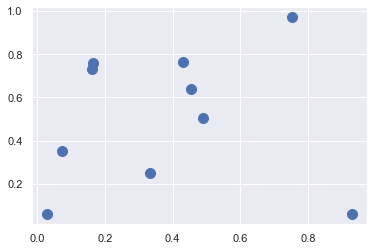

In [10]:
X = np.random.random((10, 2))
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [11]:
print(X)

[[0.07219903 0.35218704]
 [0.33418384 0.25279666]
 [0.1642288  0.76069786]
 [0.16035936 0.73089869]
 [0.75130601 0.97309432]
 [0.48974178 0.50433369]
 [0.02977444 0.0592313 ]
 [0.43163481 0.76438478]
 [0.9285235  0.05944259]
 [0.4538565  0.6383421 ]]


In [12]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)
print(differences)

(10, 10, 2)
[[[ 0.00000000e+00  0.00000000e+00]
  [-2.61984809e-01  9.93903781e-02]
  [-9.20297720e-02 -4.08510828e-01]
  [-8.81603234e-02 -3.78711652e-01]
  [-6.79106978e-01 -6.20907289e-01]
  [-4.17542749e-01 -1.52146653e-01]
  [ 4.24245903e-02  2.92955741e-01]
  [-3.59435775e-01 -4.12197749e-01]
  [-8.56324470e-01  2.92744450e-01]
  [-3.81657469e-01 -2.86155063e-01]]

 [[ 2.61984809e-01 -9.93903781e-02]
  [ 0.00000000e+00  0.00000000e+00]
  [ 1.69955037e-01 -5.07901206e-01]
  [ 1.73824486e-01 -4.78102030e-01]
  [-4.17122168e-01 -7.20297667e-01]
  [-1.55557940e-01 -2.51537031e-01]
  [ 3.04409400e-01  1.93565363e-01]
  [-9.74509660e-02 -5.11588127e-01]
  [-5.94339660e-01  1.93354072e-01]
  [-1.19672659e-01 -3.85545441e-01]]

 [[ 9.20297720e-02  4.08510828e-01]
  [-1.69955037e-01  5.07901206e-01]
  [ 0.00000000e+00  0.00000000e+00]
  [ 3.86944861e-03  2.97991758e-02]
  [-5.87077206e-01 -2.12396461e-01]
  [-3.25512977e-01  2.56364174e-01]
  [ 1.34454362e-01  7.01466568e-01]
  [-2.674060

In [13]:
sq_d = X ** 2

In [14]:
sq_d = np.add.reduce(sq_d, axis=1)

In [496]:
# sq_d = sq_d.sum(axis=1)

In [15]:
k = 4
nearest_partition = np.argpartition(sq_d, k)
nearest_partition

array([1, 6, 0, 5, 3, 2, 9, 7, 8, 4], dtype=int64)

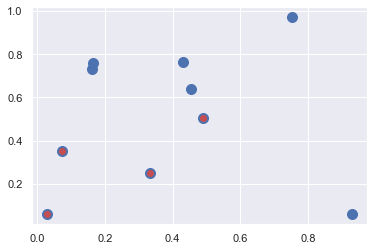

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=100);

for i in np.arange(k):
    j = nearest_partition[i]
#     plt.scatter(X[j:j+1, 0], X[j:j+1, 1], s=100, color='red');
    plt.plot(X[j][0], X[j][1], 'ro');

In [17]:
X[0][0]

0.07219903225136215

# Numpy Aggretation
* Min, Max, Sum, Avg
* Summarize a dataset

In [19]:
array = np.random.rand(10_000) 
%timeit sum(array)
%timeit np.sum(array)

569 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.58 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Min & Max

In [20]:
min(array), max(array)

(0.00010743419803838083, 0.9999532819328969)

In [21]:
np.min(array), np.max(array)

(0.00010743419803838083, 0.9999532819328969)

In [22]:
%timeit min(array)
%timeit np.min(array)

330 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.42 µs ± 58.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
array.min(), array.max(), array.sum()

(0.00010743419803838083, 0.9999532819328969, 5008.99284436412)

### Multi-demensional aggregation

In [28]:
M = np.random.random((3, 4))
print(M)

[[0.83750254 0.24089477 0.13689866 0.99409248]
 [0.01923507 0.00203246 0.51744325 0.40929428]
 [0.36574014 0.65591939 0.45316505 0.31658159]]


In [29]:
M.min(axis=0) # minimum value within each column

array([0.01923507, 0.00203246, 0.13689866, 0.31658159])

In [30]:
M.min(axis=1) # minimum value within each row

array([0.13689866, 0.00203246, 0.31658159])

In [31]:
M.sum(axis=0)

array([1.22247775, 0.89884663, 1.10750696, 1.71996834])

In [32]:
M.sum(axis=1)

array([2.20938844, 0.94800506, 1.79140617])

In [33]:
M.argmin(axis=0)

array([1, 1, 0, 2], dtype=int64)

In [511]:
M.argmin(axis=1)

array([2, 0, 0])

### Other aggregation functions - [Link](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html)

# Numpy Indexing
* Pass an array of indices to access multiple array elements at once.

In [34]:
x = np.random.randint(100, size=10)
print(x)

[96 70 21 38 82 71 20 36 36 22]


In [35]:
[x[3], x[7], x[2]]

[38, 36, 21]

In [36]:
ind = [3, 7, 2]
x[ind]

array([38, 36, 21])

In [37]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[38, 36],
       [82, 71]])

In [38]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [532]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [533]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

### Modify Data with indexing

In [519]:
x = np.arange(10)
print(x)
i = np.array([1, 3, 5, 7, 9])
x[i] = 99
print(x)

[0 1 2 3 4 5 6 7 8 9]
[ 0 99  2 99  4 99  6 99  8 99]
